<a href="https://colab.research.google.com/github/AOSPITIA/PruebaProteccion_AlejandroOspitia/blob/main/PruebaT%C3%A9cnica_AlejandroOspitia_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prueba técnica**
**ESPECIALISTA DE CIENCIA DE DATOS**

**Alejandro Ospitia**



*Enunciado primer punto*

La empresa desea identificar propiedades inmobiliarias que pertenecen a un segmento de alto valor a partir de información estructurada relacionada con características físicas, ubicación y condiciones del inmueble. Se proporciona el dataset Housing, que contiene múltiples variables descriptivas de viviendas junto con su precio de venta. A partir de esta información, se espera que el candidato formule un problema de clasificación, definiendo un criterio razonable que permita separar las viviendas en dos categorías, teniendo en cuenta que una de ellas representa una minoría relevante desde el punto de vista del negocio.
Se valorará especialmente la capacidad para identificar limitaciones del enfoque elegido, interpretar los resultados obtenidos y comunicar de forma clara las razones detrás de sus decisiones técnicas.


In [ ]:
#Importación de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, balanced_accuracy_score

In [ ]:
#Carga de información y validación de caractéristicas iniciales
df = pd.read_table("/content/Housing.txt")
print(df.shape)
print(df.columns)
df.sample(10) #se hace un muestreo aleatorio y revisar la estructura

(2930, 82)
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr B

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
762,763,904301060,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
423,424,528106020,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
1950,1951,535379110,70,RL,60.0,10800,Pave,Grvl,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,148000
2746,2747,906202040,20,RL,NaN,11200,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,180000
1248,1249,535303030,20,RL,95.0,14250,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,1500,9,2008,WD,Normal,180000
1419,1420,906204280,60,RL,NaN,9771,Pave,NaN,IR3,Lvl,...,0,NaN,GdPrv,NaN,0,6,2008,WD,Normal,260000
868,869,907265010,60,RL,NaN,11250,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,211000
1937,1938,535325320,50,RL,55.0,7150,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,115000
2237,2238,910202030,30,RM,46.0,3672,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,75200
271,272,907410080,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,213000


#**Análisis del dataset**

Se realiza un análisis del dataframe compartido para revisar si la información debe ser tratada. Para esto se revisará lo siguiente:
* Tipos de datos
* Imputación de datos nulos
* Validación de datos inconsistentes, atípicos o duplicados

In [ ]:
#Validación tipos de datos
print(df.info()) #Al no tener un diccionario de datos, no se puede hacer una transformación con certeza de los campos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

**Imputación de datos**

Como se identifica que hay presencia de valores nulos, se profundizará en el análisis para determinar como trabajar con dichos registro y hacer una imputación correcta teniendo el cuenta del entendimiento que se le pueda dar a cada variable. Lo que se busca es generar una base con la cual se pueda realizar análisis sin presencia de valores nulos atípicos que desvien el modelo más adelante.

In [ ]:
#Validación de vacios
df.isnull().sum()[df.isnull().sum() > 0]

,0
Lot Frontage,490
Alley,2732
Mas Vnr Type,1775
Mas Vnr Area,23
Bsmt Qual,80
Bsmt Cond,80
Bsmt Exposure,83
BsmtFin Type 1,80
BsmtFin SF 1,1
BsmtFin Type 2,81


In [ ]:
pd.set_option('display.max_columns', None) #Esta línea se ejecuta para que se pueda ver todas las columnas de los dataframes en colab

Se realizará la imputación de datos teniendo en cuenta las características de cada campo. Para aquellos donde no se pueda determinar un valor coherente tomando como referencia la información del dataframe se excluiran.

In [ ]:
#Campo MiscFeature
print(df["Misc Feature"].drop_duplicates())
df[pd.isna(df["Misc Feature"])].sample(10)
df[(pd.isna(df["Misc Feature"])) & (df["Misc Val"]==0)].shape
#Resultado: los registros donde Misc Feature está vacio corresponde a registros donde Misc Val es cero, indicando ausencia de valor. Para estos casos lo que se hará es crear una nueva categoría "NF" que es No feature(sin característica).

0        NaN
2       Gar2
11      Shed
206     Othr
2180    Elev
2350    TenC
Name: Misc Feature, dtype: object


(2824, 82)

In [ ]:
#Campo Fence
print(df["Fence"].drop_duplicates())
Validacion = df[pd.isna(df["Fence"])]
# Validacion = df[pd.isna(df["Fence"])].drop_duplicates("Land Slope")
Validacion["Land Slope"].value_counts()
#Resultado: para los registros donde Fence está vacio se revisaron varios campos como LotConfig, ExterCond y LandSlope pero no se encuentra relación.
#Suponiendo que no existe la categoría sin cerca y que aquellos registros dond está vacio es por que no tienen cerca, se creará una nueva categoría "NFE" que es No Fence(sin cerca).

0        NaN
1      MnPrv
11     GdPrv
70      GdWo
714     MnWw
Name: Fence, dtype: object


,count
Land Slope,
Gtl,2238
Mod,105
Sev,15


In [ ]:
#Campo PoolQC
print(df["Pool QC"].drop_duplicates())
df[pd.isna(df["Pool QC"])].sample(10)
df[(pd.isna(df["Pool QC"])) & (df["Pool Area"]==0)].shape
#Resultado: los registros donde Pool QC está vacio corresponde a registros donde Pool Area es cero, indicando ausencia de piscina. Para estos casos lo que se hará es crear una nueva categoría "NP" que es No pool(sin piscina).
#Adicional se hará la transformación del campo para pasar todos los datos a mayúsculas teniendo en cuenta que algunos están así y otros no.

0       NaN
1063     Ex
1498     Gd
1940     TA
2350     Fa
Name: Pool QC, dtype: object


(2917, 82)

In [ ]:
#Variables relacionadas con el garaje
"Garage Type"
"Garage Yr Blt"
"Garage Finish"
"Garage Cars"
"Garage Area"
"Garage Qual"
"Garage Cond"

#Validación Garage Area
df[(pd.isna(df["Garage Area"]))
# | (df["Garage Area"]==0)
]

#Validación otros campos que dependen de Garage Area
df['Garage Type'].unique(), df['Garage Yr Blt'].unique(), df["Garage Finish"].unique(), df["Garage Cars"].unique(), df["Garage Qual"].unique(), df["Garage Cond"].unique()

#Validación igualdad Garage Qual y Garage Cond
Validacion = df[(~(df["Garage Qual"]==df["Garage Cond"])) & (pd.notna(df["Garage Qual"])) & (pd.notna(df["Garage Cond"]))]
Validacion

#Resultado: Para el registro donde Garage Area está vacío es porque no tiene parqueadero, por todo lo relacionado con el garaje debería indicar ausencia.
#Resultado: los registros donde Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Qual y Garage Cond están vacios corresponde a registros donde Garage Area es cero, indicando ausencia de garaje.
"""
Para estos casos lo que se hará es lo siguiente:
  - Crear una nueva categoría "NGT" que es No Garage Type(sin ubicación de garaje).
  - Imputar con 0 el campo Garage Yr Bl(sin año de construcción del garaje).
  - Crear una nueva categoría "NGF" que es No Garage Finish(sin acabado del garaje).
  - Imputar con 0 el campo Garage Cars(sin número de vehículos en garaje).
  - Imputar con 0 el campo Garage Area(sin garaje).
  - Crear una nueva categoría "NGQ" que es No Garage Qual(sin calidad del garaje).
  - Crear una nueva categoría "NGC" que es No Garage Cond(sin condición del garaje). Este campo en la mayoría de registros es igual a Garage Qual, cambia en 150 registros únicamente.
  """

'\nPara estos casos lo que se hará es lo siguiente:\n  - Crear una nueva categoría "NGT" que es No Garage Type(sin ubicación de garaje).\n  - Imputar con 0 el campo Garage Yr Bl(sin año de construcción del garaje).\n  - Crear una nueva categoría "NGF" que es No Garage Finish(sin acabado del garaje).\n  - Imputar con 0 el campo Garage Cars(sin número de vehículos en garaje).\n  - Imputar con 0 el campo Garage Area(sin garaje).\n  - Crear una nueva categoría "NGQ" que es No Garage Qual(sin calidad del garaje).\n  - Crear una nueva categoría "NGC" que es No Garage Cond(sin condición del garaje). Este campo en la mayoría de registros es igual a Garage Qual, cambia en 150 registros únicamente.\n  '

In [ ]:
#Campo FireplaceQu
print(df["Fireplace Qu"].drop_duplicates())
df[pd.isna(df["Fireplace Qu"])].sample(10)
df[(pd.isna(df["Fireplace Qu"])) & (df["Fireplaces"]==0)].shape

0      Gd
1     NaN
3      TA
13     Po
17     Ex
24     Fa
Name: Fireplace Qu, dtype: object


(1422, 82)

In [ ]:
#Variables relacionadas con el sótano
"Bsmt Qual"
"Bsmt Cond"
"Bsmt Exposure"
"BsmtFin Type 1"
"BsmtFin SF 1"
"BsmtFin Type 2"
"BsmtFin SF 2"
"Bsmt Unf SF"
"Total Bsmt SF"
"Bsmt Full Bath"
"Bsmt Half Bath"

#Validación Total Bsmt SF
df[(pd.isna(df["Total Bsmt SF"]))
# | (df["Total Bsmt SF"]==0)
]

#Validación otros campos que dependen de Garage Area
df['Bsmt Qual'].unique(), df['Bsmt Cond'].unique(), df["Bsmt Exposure"].unique(), df["BsmtFin Type 1"].unique(), df["BsmtFin SF 1"].unique(),
df["BsmtFin Type 2"].unique(), df["BsmtFin SF 2"].unique(), df["Bsmt Unf SF"].unique(), df["Bsmt Full Bath"].unique(), df["Bsmt Half Bath"].unique()


#Resultado: Para el registro donde Total Bsmt SF está vacío es porque no tiene sótano, por ende todo lo relacionado con el sótano debería indicar ausencia.
#Resultado: los registros relacionados con Total Bsmt SF y que están vacios corresponden a registros donde Total Bsmt SF es cero, indicando ausencia de sótano.
"""
Para estos casos lo que se hará es lo siguiente:
  - Crear una nueva categoría "NBQ" que es No Basement Qual(sin ubicación de sótano). Adicional se convierte a mayúsculas.
  - Crear una nueva categoría "NBC" que es No Basement Cond(sin ubicación de sótano). Adicional se convierte a mayúsculas.
  - Crear una nueva categoría "NBE" que es No Basement Exposure(sin ubicación de sótano).
  - Crear una nueva categoría "NBFT1" que es No Basement Fin Type 1(sin ubicación de sótano). Adicional se convierte a mayúsculas.
  - Crear una nueva categoría "NBFT2" que es No Basement Fin Type 2(sin ubicación de sótano). Adicional se convierte a mayúsculas.
  - Imputar con 0 el campo BsmtFin SF 1(sin área de sótano).
  - Imputar con 0 el campo BsmtFin SF 2(sin área de sótano).
  - Imputar con 0 el campo Bsmt Unf SF(sin área de sótano).
  - Imputar con 0 el campo Total Bsmt SF(sin área de sótano).
  - Imputar con 0 el campo Bsmt Full Bath(sin baño completo de sótano).
  - Imputar con 0 el campo Bsmt Half Bath(sin baño medio de sótano).
  """

'\nPara estos casos lo que se hará es lo siguiente:\n  - Crear una nueva categoría "NBQ" que es No Basement Qual(sin ubicación de sótano). Adicional se convierte a mayúsculas.\n  - Crear una nueva categoría "NBC" que es No Basement Cond(sin ubicación de sótano). Adicional se convierte a mayúsculas.\n  - Crear una nueva categoría "NBE" que es No Basement Exposure(sin ubicación de sótano).\n  - Crear una nueva categoría "NBFT1" que es No Basement Fin Type 1(sin ubicación de sótano). Adicional se convierte a mayúsculas.\n  - Crear una nueva categoría "NBFT2" que es No Basement Fin Type 2(sin ubicación de sótano). Adicional se convierte a mayúsculas.\n  - Imputar con 0 el campo BsmtFin SF 1(sin área de sótano).\n  - Imputar con 0 el campo BsmtFin SF 2(sin área de sótano).\n  - Imputar con 0 el campo Bsmt Unf SF(sin área de sótano).\n  - Imputar con 0 el campo Total Bsmt SF(sin área de sótano).\n  - Imputar con 0 el campo Bsmt Full Bath(sin baño completo de sótano).\n  - Imputar con 0 el ca

In [ ]:
#Campo Electrical
print(df["Electrical"].drop_duplicates())
df[pd.isna(df["Electrical"])]
#Resultado: se elimina 1 registro por lo que revisando no se puede garantizar una relación directa con otro campo ya que hace referencia al sistema eléctrico.

0       SBrkr
82      FuseA
186     FuseF
943     FuseP
1577      NaN
2239      Mix
Name: Electrical, dtype: object


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,1578,916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [ ]:
#Campo Alley
print(df["Alley"].drop_duplicates())
Validacion = df[pd.isna(df["Alley"])]
Validacion["Land Slope"].value_counts()
df[pd.isna(df["Alley"])].sample(5)
#Resultado: para los registros donde Alley está vacio se revisaron varios campos como Lot Config, Street y Land Slope pero no se encuentra relación.
#Suponiendo que los registros donde está vacio es por que no tienen acceso por callejón, se creará una nueva categoría "NAL" que es No Alley(sin acceso por callejón).

0       NaN
94     Pave
170    Grvl
Name: Alley, dtype: object


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1307,1308,902300110,190,RM,69.0,9142,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,5,5,1900,2006,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Fa,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,797.0,797.0,GasA,TA,N,FuseA,830,797,0,1627,0.0,0.0,2,0,4,2,TA,10,Typ,0,NaN,Detchd,1950.0,Unf,2.0,420.0,Fa,Po,N,192,0,60,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,139500
1685,1686,528102090,20,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2007,2007,Hip,CompShg,CemntBd,CmentBd,BrkFace,452.0,Ex,TA,PConc,Ex,TA,Av,GLQ,48.0,Unf,0.0,1774.0,1822.0,GasA,Ex,Y,SBrkr,1828,0,0,1828,0.0,0.0,2,0,3,1,Gd,9,Typ,1,Gd,Attchd,2007.0,Unf,3.0,774.0,TA,TA,Y,0,108,0,0,260,0,NaN,NaN,NaN,0,7,2007,New,Partial,314813
2382,2383,528110050,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
2489,2490,532353180,80,RL,88.0,8471,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,6,7,1977,1995,Gable,CompShg,HdBoard,Plywood,BrkFace,46.0,TA,TA,CBlock,Gd,Gd,Av,ALQ,506.0,Unf,0.0,0.0,506.0,GasA,TA,Y,SBrkr,1212,0,0,1212,1.0,0.0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1978.0,Unf,2.0,492.0,TA,TA,Y,292,12,0,0,0,0,NaN,GdWo,NaN,0,7,2006,WD,Normal,151000
2447,2448,528344060,60,RL,78.0,12011,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,530.0,Gd,TA,PConc,Gd,TA,Av,GLQ,956.0,Unf,0.0,130.0,1086.0,GasA,Ex,Y,SBrkr,1086,838,0,1924,1.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1998.0,RFn,2.0,592.0,TA,TA,Y,208,75,0,0,374,0,NaN,NaN,NaN,0,6,2006,WD,Normal,280000


In [ ]:
#Validación si Mas Vnr Area está contenida en los vacios de Mas Vnr Type
df[(pd.isna(df["Mas Vnr Area"])) & (pd.isna(df["Mas Vnr Type"]))].shape
df[(pd.isna(df["Mas Vnr Area"])) & (pd.isna(df["Mas Vnr Type"]))].sample(5)

print(df["Mas Vnr Area"].drop_duplicates())
print(df["Mas Vnr Type"].drop_duplicates())

#Resultado: para los registros donde Mas Vnr Area está vacio es porque Mas Vnr Type está vacio y están contenidos. Mas Vnr Type se imputará con "NMVT" y Mas Vnr Area con 0.

0       112.0
1         0.0
2       108.0
5        20.0
15      603.0
        ...  
2891    293.0
2894    653.0
2899    630.0
2902    382.0
2906    443.0
Name: Mas Vnr Area, Length: 446, dtype: float64
0         Stone
1           NaN
2       BrkFace
89       BrkCmn
2298     CBlock
Name: Mas Vnr Type, dtype: object


In [ ]:
#Campo Lot Frontage
print(df["Lot Frontage"].drop_duplicates())
Validacion = df[pd.isna(df["Lot Frontage"])]
Validacion["Street"].value_counts()
df[pd.isna(df["Lot Frontage"])].sample(5)
#Resultado: para los registros donde Lot Frontage está vacio se debe imputar con un valor numérico y que no sea 0 por lo que no tiene coherencia. Para este se calculará la media para los vecinos y se imputará.

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2321    168.0
2380    111.0
2398    131.0
2689    153.0
2750    133.0
Name: Lot Frontage, Length: 129, dtype: float64


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1019,1020,527302070,20,RL,NaN,10825,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,7,1983,1983,Gable,CompShg,WdShing,Plywood,BrkFace,174.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,747.0,Unf,0.0,513.0,1260.0,GasA,TA,Y,SBrkr,1260,0,0,1260,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1983.0,Unf,2.0,598.0,TA,TA,Y,152,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,181900
1570,1571,916125425,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249.0,BLQ,147.0,103.0,1499.0,GasA,Ex,Y,SBrkr,1619,167,0,1786,2.0,0.0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2.0,529.0,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
108,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
2518,2519,533253030,120,RL,NaN,3760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Greens,Norm,Norm,Twnhs,1Story,8,5,1980,1980,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Gd,TA,CBlock,Gd,TA,Gd,GLQ,1009.0,LwQ,182.0,44.0,1235.0,GasA,Gd,Y,SBrkr,1235,0,0,1235,1.0,0.0,1,0,1,1,TA,4,Typ,3,TA,Attchd,1980.0,Fin,2.0,484.0,TA,TA,Y,133,78,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,214000
873,874,907285020,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739.0,Unf,0.0,318.0,1057.0,GasA,Ex,Y,SBrkr,1057,977,0,2034,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,1998.0,RFn,2.0,645.0,TA,TA,Y,576,36,0,0,0,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500


Aplicación de transformaciones y limpiezas sobre el dataframe

Teniendo en cuenta el análisis por campo que se realizó, se aplican los ajustes al dataframe.

In [ ]:
#Campo Electrical
df.dropna(subset=["Electrical"], inplace=True)
#Campo PoolQC
df["Pool QC"] = df["Pool QC"].fillna("NP").str.upper()
#Campo MiscFeature
df["Misc Feature"] = df["Misc Feature"].fillna("NF")
#Campo FireplaceQu
df["Fireplace Qu"] = df["Fireplace Qu"].fillna("NFP").str.upper()
#Campo Fence
df["Fence"] = df["Fence"].fillna("NFE")
#Campo Alley
df["Alley"] = df["Alley"].fillna("NAL")
#Campos Garage
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(0)
df["Garage Cars"]  = df["Garage Cars"].fillna(0)
df["Garage Area"]  = df["Garage Area"].fillna(0)
df["Garage Type"]   = df["Garage Type"].fillna("NGT")
df["Garage Finish"] = df["Garage Finish"].fillna("NGF")
df["Garage Qual"]   = df["Garage Qual"].fillna("NGQ")
df["Garage Cond"]   = df["Garage Cond"].fillna("NGC")
#Campos Basement
df["Bsmt Qual"] = df["Bsmt Qual"].fillna("NBQ")
df["Bsmt Cond"]      = df["Bsmt Cond"].fillna("NBC")
df["Bsmt Exposure"]  = df["Bsmt Exposure"].fillna("NBE")
df["BsmtFin Type 1"]  = df["BsmtFin Type 1"].fillna("NBFT1")
df["BsmtFin Type 2"]  = df["BsmtFin Type 2"].fillna("NBFT2")
df["BsmtFin SF 1"]  = df["BsmtFin SF 1"].fillna(0)
df["BsmtFin SF 2"]  = df["BsmtFin SF 2"].fillna(0)
df["Bsmt Unf SF"]   = df["Bsmt Unf SF"].fillna(0)
df["Total Bsmt SF"] = df["Total Bsmt SF"].fillna(0)
df["Bsmt Full Bath"] = df["Bsmt Full Bath"].fillna(0)
df["Bsmt Half Bath"] = df["Bsmt Half Bath"].fillna(0)
#Campos Mas Vnr
df["Mas Vnr Type"]  = df["Mas Vnr Type"].fillna("NMVT")
df["Mas Vnr Area"]  = df["Mas Vnr Area"].fillna(0)
#Campo Lot Frontage
df["Lot Frontage"] = df["Lot Frontage"].fillna(df.groupby("Neighborhood")["Lot Frontage"].transform("median"))

In [ ]:
#Se vuelve a validar los vacíos
df.isnull().sum()[df.isnull().sum() > 0]

,0
Lot Frontage,3


In [ ]:
#Como se evidencia que Lot Frontage presenta 3 registros vacios, se hara la corrección tomando la media del conjunto completo para esos casos.
df[pd.isna(df["Lot Frontage"])]
df["Lot Frontage"] = df["Lot Frontage"].fillna(df["Lot Frontage"].median())

**Análisis de datos atípicos/outliers**

Una vez se tiene el dataframe sin datos nulos e imputado correctamente, se revisará si hay datos atípicos que puedan afectar la aplicación del modelo.

In [ ]:
#Detección de inconsistencias del sótano
bsmt_inconsistencias = df[(df["Total Bsmt SF"] == 0) & ((df["BsmtFin SF 1"] > 0) |
                                                        (df["BsmtFin SF 2"] > 0) |
                                                        (df["Bsmt Unf SF"] > 0) |
                                                        (df["Bsmt Full Bath"] > 0) |
                                                        (df["Bsmt Half Bath"] > 0) |
                                                        (~df["Bsmt Qual"].str.startswith("NB")) |
                                                        (~df["Bsmt Cond"].str.startswith("NB")) |
                                                        (~df["Bsmt Exposure"].str.startswith("NB")) |
                                                        (~df["BsmtFin Type 1"].str.startswith("NB")) |
                                                        (~df["BsmtFin Type 2"].str.startswith("NB")))
                          ]

bsmt_inconsistencias.shape[0]
#Resultado: no se encuentran inconsistencias

0

In [ ]:
#Detección de inconsistencias del garaje
garage_inconsistencias = df[(df["Garage Area"] == 0) & ((df["Garage Cars"] > 0) |
                                                        ((df["Garage Yr Blt"] > 0) | (df["Garage Yr Blt"] > 2026)) |
                                                        (~df["Garage Type"].str.startswith("NG")) |
                                                        (~df["Garage Finish"].str.startswith("NG")) |
                                                        (~df["Garage Qual"].str.startswith("NG")) |
                                                        (~df["Garage Cond"].str.startswith("NG")))
                            ]

garage_inconsistencias.shape[0]
garage_inconsistencias
df = df[df["Order"]!=2237]
#Resultado: se encuentran una inconsistencia, se omite del df

In [ ]:
#Detección de inconsistencias piscina
pool_inconsistencias = df[(df["Pool QC"] == "NP") & (df["Pool Area"] > 0)]
pool_inconsistencias.shape[0]
#Resultado: no se encuentran inconsistencias

0

In [ ]:
#Detección de inconsistencias chimenea
fireplace_inconsistencias = df[(df["Fireplace Qu"] == "NFP") & (df["Fireplaces"] > 0)]
fireplace_inconsistencias.shape[0]
#Resultado: no se encuentran inconsistencias

0

In [ ]:
#Detección de inconsistencias año construcción
yearbuilt_inconsistencias = df[(df["Year Built"] > df["Yr Sold"]) | (df["Year Built"] < 1800) | (df["Year Built"] > 2026)]
yearbuilt_inconsistencias.shape[0]
yearbuilt_inconsistencias
df = df[df["Order"]!=2181]
#Resultado: se encuentran una inconsistencia, se omite del df

In [ ]:
#Detección de datos duplicados
duplicados = df[df.duplicated()]
duplicados.shape[0]
#Resultado: no se encuentran inconsistencias

0

#**Análisis descriptivo exploratorio**

Se realiza un análisis descriptivo para entender el comportamiento de los datos una vez obtenido el dataframe con el que se desarrollará el modelo.

In [ ]:
Descriptivo = df.copy()

<Axes: >

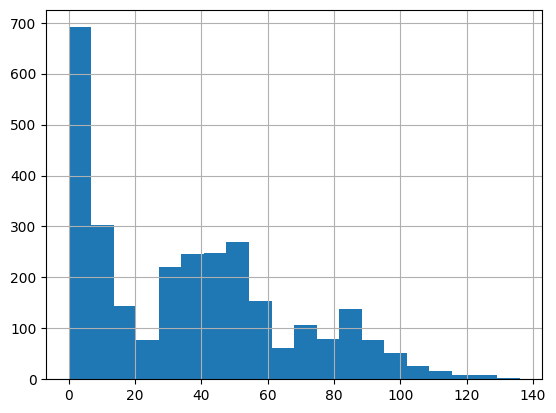

In [ ]:
#Edad de las casas
Descriptivo["House Age"] = Descriptivo["Yr Sold"] - Descriptivo["Year Built"]
Descriptivo["House Age"].hist(bins=20)
#Se observa una relación de que las casas nuevas por fecha de construcción tienden a valer más.

,House Age,SalePrice
House Age,1.000000,-0.559276
SalePrice,-0.559276,1.000000


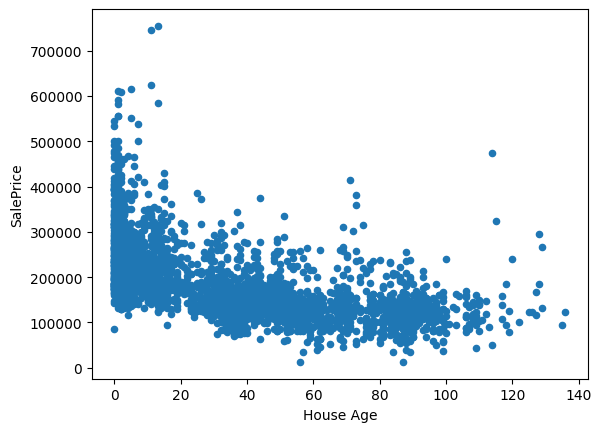

In [ ]:
#Relación entre edad de las casas y su valor
Descriptivo.plot('House Age','SalePrice', kind = 'scatter')
Descriptivo[['House Age', 'SalePrice']].corr()
# Se observa una correlación inversamente proporcional entre la contrucción y la fecha de construcción


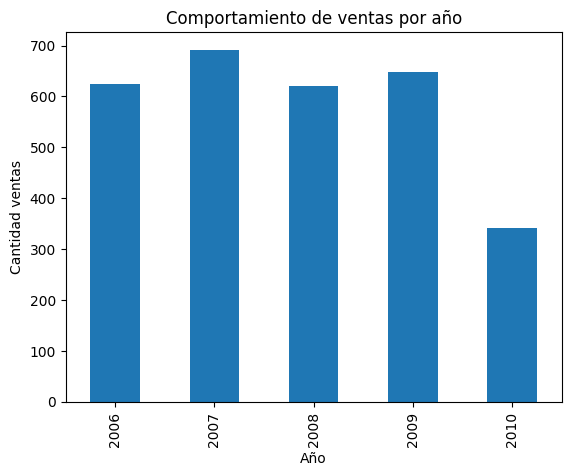

In [ ]:
#Comportamiento de venta de casas a través del tiempo
Descriptivo["Yr Sold"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Año")
plt.ylabel("Cantidad ventas")
plt.title("Comportamiento de ventas por año")
plt.show()
# No se observa una desviación importante entre las ventas por año, exceptuando el 2010 la cual puede deberse a la cantidad de registros del año.

**Análisis de las variables o features que seleccionadas**

El precio de una casa se puede asociar a ciertas características específicas principalmente de la ubiación, elementos estructuares o acabados, número de espacios y uso, así como las dimensiones. Por esto, se seleccionan los siguientes campos para ser utiizados en el modelo:

1. "Overall Qual" (Calidad materiales y acabados)
2. "Overall Cond" (Condición de la vivienda)
3. "Gr Liv Area" (Área habitable)
4. "Total Bsmt SF" (Área del sótano)
5. "Garage Area" (Área del garaje)
6. "Garage Cars" (Capacidad del garaje)
7. "Lot Area" (Tamaño de lote)
8. "Year Built" (Año construcción)
9. "Lot Frontage" (Metros de frente de calle junto a la propiedad)
11. "Neighborhood" (Vecindario)
12. "House Style" (Estilo vivienda)
13. "Bldg Type" (Tipo de vivienda)
14. "Exter Qual" (Calidad exterior)
15. "Kitchen Qual" (Calidad cocina)
16. "Lot Config" (Ubicación del lote (esquinero, interior, etc))

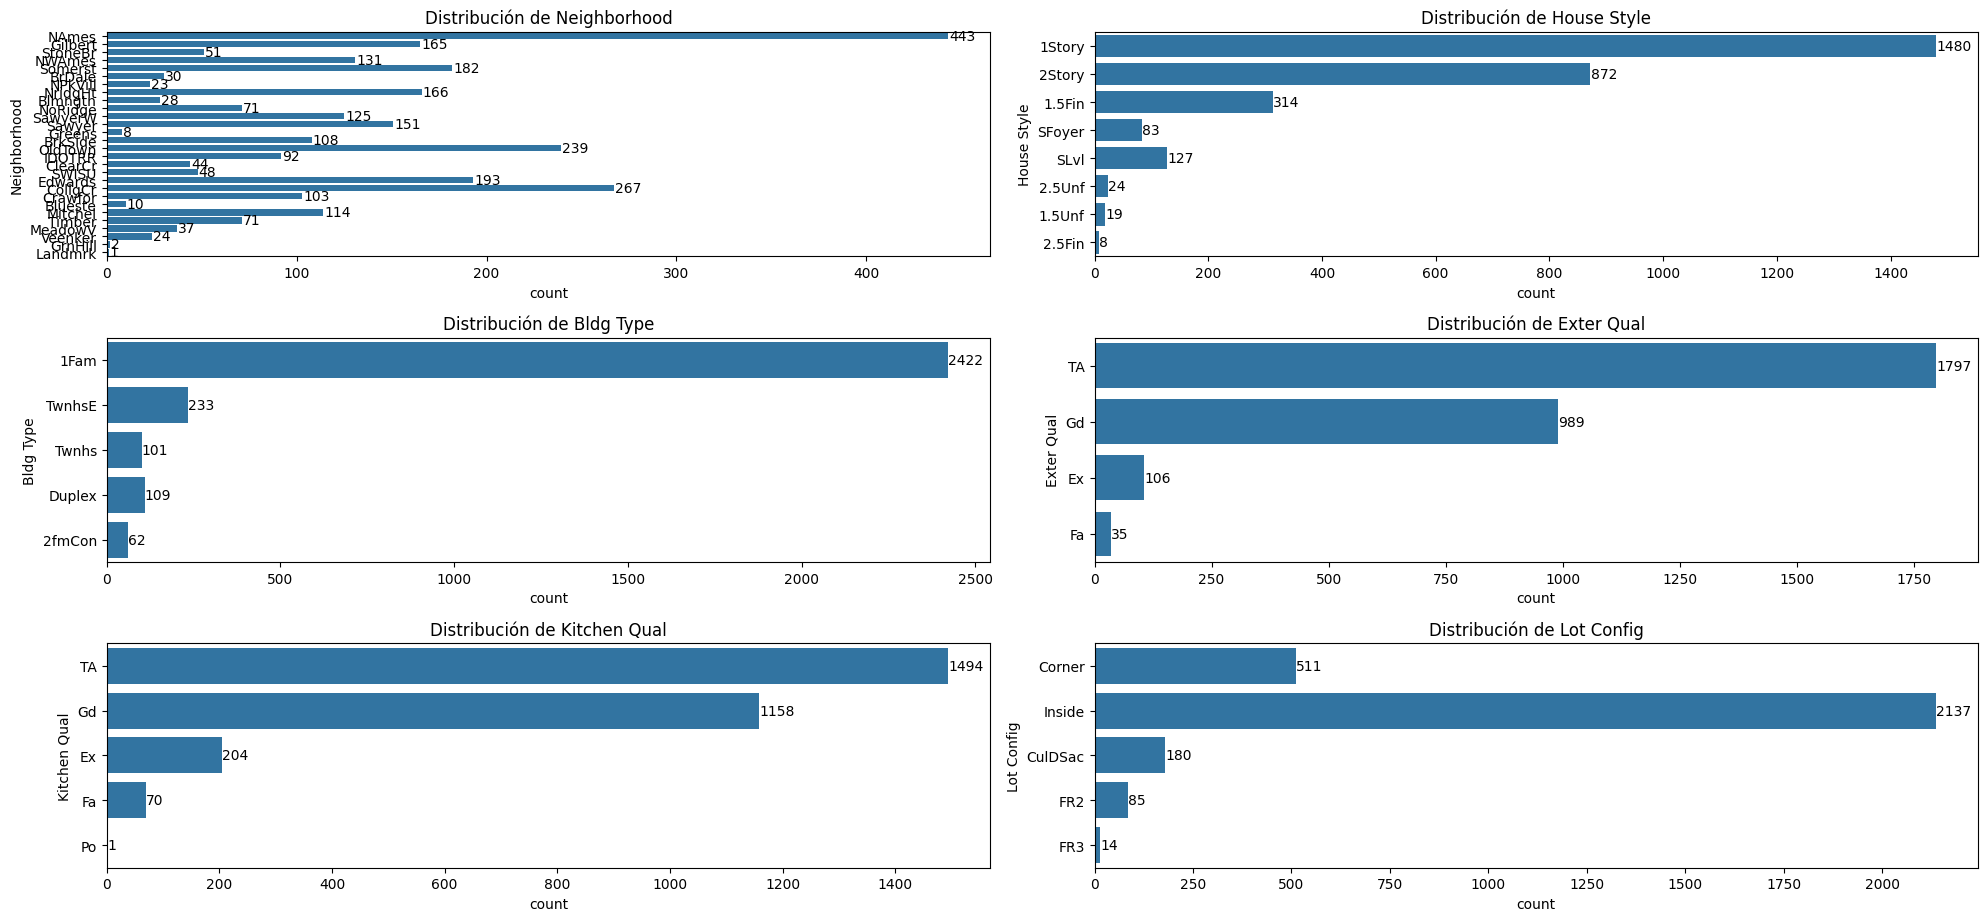

In [ ]:
#Distribución características categóricas
Campos = ["Neighborhood","House Style","Bldg Type","Exter Qual","Kitchen Qual","Lot Config"]
plt.figure(figsize=(20, 15))
for i, var in enumerate(Campos):
    plt.subplot(5, 2, i + 1)
    ax = sns.countplot(y=var, data=Descriptivo)
    for p in ax.patches:
        ancho = p.get_width()
        ax.text(ancho + 0.5, p.get_y() + p.get_height() / 2,
                f'{int(ancho)}', va='center')
    plt.title(f"Distribución de {var}")
plt.tight_layout()
plt.show()

#**Desarrollo del módelo**

Con el dataframe obtenido y entendido el objetivo del modelo, se procede a desarrollar, entrenar e implementar un modelo de regresión logística.
* Selección de features para el modelo y Encoding
* Definición de variables independientes y del target
* División de la base para entrenamiento (80) y testeo (20)


**Selección variables y Encoding**

Partiendo del fundamente identificado en el análisis descriptivo y las características seleccionadas se aplica el encoding a aquellas que son categóricas con One Hot encoding ya que permite obtener unos resultados mayores teniendo en cuenta la información sobre la cual se trabajara (hay variables categóricas que no tiene un posicionamiento ordinal)

In [ ]:
#Conformación del dataset
dataset = df.copy()
dataset = dataset[[#Numéricas
                  "Overall Qual","Overall Cond","Gr Liv Area","Total Bsmt SF","Garage Area",
                  "Garage Cars","Lot Area","Year Built","Lot Frontage",
                  #Categóricas
                  "Neighborhood","House Style","Bldg Type","Exter Qual","Kitchen Qual","Lot Config"]]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2927 non-null   int64  
 1   Overall Cond   2927 non-null   int64  
 2   Gr Liv Area    2927 non-null   int64  
 3   Total Bsmt SF  2927 non-null   float64
 4   Garage Area    2927 non-null   float64
 5   Garage Cars    2927 non-null   float64
 6   Lot Area       2927 non-null   int64  
 7   Year Built     2927 non-null   int64  
 8   Lot Frontage   2927 non-null   float64
 9   Neighborhood   2927 non-null   object 
 10  House Style    2927 non-null   object 
 11  Bldg Type      2927 non-null   object 
 12  Exter Qual     2927 non-null   object 
 13  Kitchen Qual   2927 non-null   object 
 14  Lot Config     2927 non-null   object 
dtypes: float64(4), int64(5), object(6)
memory usage: 365.9+ KB


In [ ]:
#Aplicar encoding a los campos categóricos
dataset = pd.get_dummies(dataset,columns=["Neighborhood","House Style","Bldg Type","Exter Qual","Kitchen Qual","Lot Config"],
                                 drop_first=True  # se incluye esta línea para evitar variables que no correspondan
                         )

**Conformación de variables independientes y del target**

Como el objetivo del modelo es clasificar los inmuebles en dos categorías y que debe ser importante para el objetivo del inmueble, se toma como referencia el valor de la casa y por ende, se toma como primer clase el 15% del top de precios por casa; la otra categoría será las que no están dentro del top y la importancia de negocio.

In [ ]:
#Generación de "y" y "X" acorde a la clasificación solicitada
X = dataset
y = (df["SalePrice"] >= df["SalePrice"].quantile(0.85)).astype(int)
y.value_counts(normalize=True)

,proportion
SalePrice,
0,0.849334
1,0.150666


**División de la base en entrenamiento y testeo**

In [ ]:
#Conformación conjunto de entrenamiento, validación y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
#Desarrollo Regresión logística
lr = LogisticRegression(max_iter = 300)
model_lr = lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

# Evaluemos el desempeño del modelo

print(f'Accuracy: {accuracy_score(y_test, pred_lr)}')
print(f'Balanced accuracy: {balanced_accuracy_score(y_test, pred_lr)}')
print(f'Precision: {precision_score(y_test, pred_lr)}')
print(f'Recall: {recall_score(y_test, pred_lr)}')
print(f'F1 Score: {f1_score(y_test, pred_lr)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, pred_lr)}')

Accuracy: 0.9573378839590444
Balanced accuracy: 0.9000547645125958
Precision: 0.8888888888888888
Recall: 0.8181818181818182
F1 Score: 0.8520710059171598
ROC AUC Score: 0.9000547645125959


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Comparar reales vs predecidos
comparacion = pd.DataFrame({"y_test":y_test, "lrs_pred":pred_lr})
comparacion = pd.concat([X_test,comparacion], axis = 1)
errores = comparacion[comparacion["y_test"] != comparacion["lrs_pred"]]
aciertos = comparacion[comparacion["y_test"] == comparacion["lrs_pred"]]
print(f"Errores: {errores.shape[0]}")
print(f"Aciertos: {aciertos.shape[0]}")


Errores: 25
Aciertos: 561


#**Conclusiones**

1. Sería bueno disponer un diccionario de datos para entender el significado de cada campo y así mismo determinar si los datos están o no en el formato correcto.
2. Se realizó una imputación coherente a cada campo según el entendimiento que se obtuvo de cada uno.
3. Se realizó la omisión de los registros que presentaron valores atípicos segun las validaciones implementadas.
3. Sobre la base obtenida después de realizar el proceso de limpieza se ejecutó un análisis descriptivo sobre las características. Teniendo en cuenta la experiencia y la información visualizada, se seleccionaron los campos para desarrollar y entrenar el modelo.
4. Se plantea como importancia de negocio el precio de los inmuebles y para la clasificación se realiza en dos categorias siendo una el 15% de los inmuebles con mayor precio y otra catergoria con el 85% restante de la base.
5. Se aplica un encoding a través de One Hot Encoding teniendo en cuenta que se seleccionaron variables que no son ordinales. Hay que también tener en cuenta que al aplicar este método se incrementa considerablemente las dimensiones del dataset el cual puede implicar más esfuerzos en su tratamiento.
6. Se aplica una regresión logística teniendo en cuenta que se busca una clasificación y funciona bien con el encoding seleccionado.
6. Se obtiene un accuracy de 0.9573 indicando una buena presición, adicional tiene en cuenta las dos categorías demostrando un buen balance.
7. Teniendo en cuenta el planteamiento de la importancia del negocio según el recall se captura el 82% de las viviendas dentro del top definido (18% son falsos negativos).
8. El modelo según las métricas clasifica bien y tiene un comportamiento consistente. Como puntos a tener en cuenta respecto a las limitaciones son que el umbral de clasificación es fijo (85, 15), que al ser desarrollado a través de la regresión lineal el modelo asume relaciones lineales